Importing Libraries

In [1]:
# important package
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix


Importing Dataset

In [2]:
raw_df = pd.read_csv("advertising_sales.csv")              # to import .csv file

In [3]:
df = raw_df.copy()

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There is no Nan or missing values in dataset

In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


There is huge spending on TV advertisement on an average 147,000 dollars and minimum on radio of 23,000 dollars

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no missing values in any data .

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

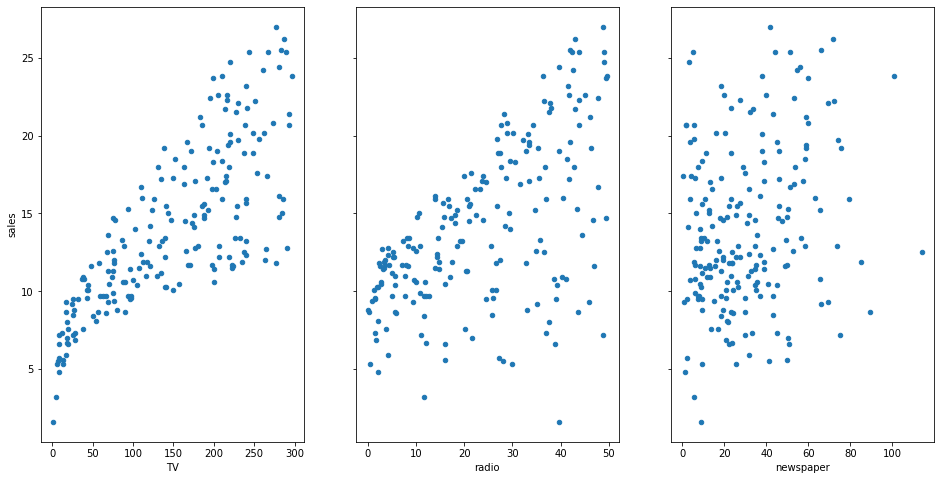

In [8]:
#Visualization the relationship between features and response using ScatterPLot

fig, axs=plt.subplots(1, 3,sharey=True)
df.plot(kind='scatter', x='TV',y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio',y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper',y='sales', ax=axs[2])

Data is linear in 'TV' vs 'sales' also 'radio' vs 'sales'

But is very poorly scattered data as seen in 'newespaper' vs 'sales'.

Data Cleaning

In [9]:
#As we have unnecessary column named 'Unnamed'

df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Dropped unwanted column which is not needed

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values

C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RoshanV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


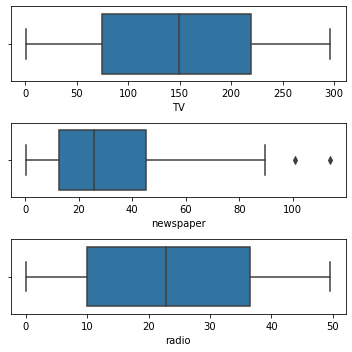

In [12]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [13]:
# Position of the Outlier
outliers=np.where(df['newspaper']>100)

outliers

(array([ 16, 101], dtype=int64),)

There is not much outliers in our data

In [14]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:>

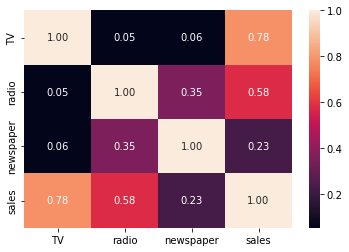

In [15]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

Data Preprocessing

In [27]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [28]:
y = df['sales']
x = df.drop(['sales'], axis=1).values
x_features = df.iloc[:,1:]


In [29]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [30]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [46]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y , test_size = 0.2, random_state = 42)

Model Training

In [42]:
### Simple Linear Regression/ Multiple Linear Regression ###
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test , y_test)

0.8927605914615385

Model Prediction

Metrices

In [43]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6.450669386600652


In [44]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.2402660430537842